# Malware Detection using Deep Learning

This notebook aims to build a **Convolutional Neural Network** model to perform a **Detection** of Malwares from the **Malimg Dataset**.

# Data : 
A Malware can belong to one of the following class : 
 * Adialer.C
 * Agent.FYI
 * Allaple.A
 * Allaple.L
 * Alueron.gen!J
 * Autorun.K
 * C2LOP.P
 * C2LOP.gen!g
 * Dialplatform.B
 * Dontovo.A
 * Fakerean
 * Instantaccess
 * Lolyda.AA1
 * Lolyda.AA2
 * Lolyda.AA3
 * Lolyda.AT
 * Malex.gen!J
 * Obfuscator.AD
 * Rbot!gen
 * Skintrim.N
 * Swizzor.gen!E
 * Swizzor.gen!I
 * VB.AT
 * Wintrim.BX
 * Yuner.A

# Preprocessing - Converting to images

Raw malwares will be stored in the following folder:

In [12]:
root = "D:\\3.HocTap\\NhapMonATTT\\DoAn_4 - Copy\\convertTest"

The following function allows us to convert our hexadecimal **.bytes** files stored into our 'data' folder, into PNG images.

In [13]:
import sys
import codecs
import os
import math
from math import log
import numpy as np
import scipy as sp
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from androguard.core.bytecodes.apk import APK
from androguard.core.bytecodes import dvm
from androguard.core.analysis import analysis
from matplotlib import cm

#function get bytes from apk
def get_bytes(apk: APK , file_type: str) -> bytes:
    assert file_type in {".dex", ".so", ".xml"}
    for f in apk.get_files():
        if f.endswith(file_type):
            yield apk.get_file(f)

#function that help us to convert our hexadecimal files into png images and save them in the same folder
def generate_png(apk: APK, filename: str, file_type: str):
    assert file_type in {".dex", ".so", ".xml"}
    stream = bytes()
    array = []
    for s in get_bytes(apk, file_type):
        stream += s
        array = np.frombuffer(s, dtype=np.uint8)
    # conversion from binary to hexadecimal
    hex_data = codecs.encode(stream, "hex_codec")

    # deleting leftovers of byte file

    hex_data = str(hex_data)
    hex_data = (hex_data.replace("b'", ""))
    hex_data = (hex_data.replace("'", ""))

    # splitting the previous list in n list of length 6 characters

    long_list = [hex_data[i:i + 6] for i in range(0, len(hex_data), 6)]
    long_list.pop()

    # creation of a new list where RGB code will be stored of each sublist previously created

    colorList = []

    # calculation of RGB code of each sublist

    for element in long_list:
        colorList.append(tuple(int(element[i:i + 2], 16) for i in (0, 2, 4)))

    # creation of a new image of dimension sqrt(len(colorList)

    img_size = int(math.sqrt(len(colorList)))
    print(img_size)

    img = Image.new("RGB", (img_size, img_size))

    pixels = img.load()

    

    # filling matrix with the colors

    for x in range(img_size):
        for y in range(img_size):
            pixels[x, y] = colorList[img_size * x + y]
    image = ImageOps.grayscale(img)
    image.show()
    print(array)
    print(array.shape)
    current_len = len(stream)
    print(current_len)
    print(stream)
    #image = image.resize((1, 64*64), resample=Image.BILINEAR)
   
    
    filename = filename.split('.')[0]
    image.save(root+'\\'+name+'.png', "PNG")

    return image

## This function allows us to process our hexadecimal files into png images##
def convertAndSave(array,name):
    print('Processing '+name)
    if array.shape[1]!=16: #If not hexadecimal
        assert(False)
    b=int((array.shape[0]*16)**(0.5))
    b=2**(int(log(b)/log(2))+1)
    a=int(array.shape[0]*16/b)
    array=array[:a*b//16,:]
    array=np.reshape(array,(a,b))
    im = Image.fromarray(np.uint8(array))
    im.save(root+'\\'+name+'.png', "PNG")
    return im

#Get the list of files
files=os.listdir(root)
print('files : ',files)
#We will process files one by one.
for counter, name in enumerate(files):
        #We only process .bytes files from our folder.
        if ( '.apk' != name[-4:]):
            continue
        f=open(root+'/'+name)
        
        apk = APK(root+'/'+name)
        app_dex = dvm.DalvikOdexVMFormat(apk.get_dex())
        app_x = analysis.Analysis(app_dex)
        print(app_x)
        dex_img = generate_png(apk,root+'/'+name , '.dex')
        #so_img = generate_png(apk,root+'/'+name , '.so')
        #xml_img = generate_png(apk,root+'/'+name , '.xml')
       
        #plt.imshow(dex_img)
        #plt.imshow(so_img)
        #plt.imshow(xml_img)
        #img = mpimg.imread(dex_img)
        #imgplot = plt.imshow(img)
        #plt.show()
        '''
        array=[]
        for line in f:
            xx=line.split()
            if len(xx)!=17:
                continue
            array.append([int(i,16) if i!='??' else 0 for i in xx[1:] ])
        plt.imshow(convertAndSave(np.array(array),name))
        del array
        f.close()
        '''



files :  ['642da73bc4c78004304dfed2e6e704ebb352ff9f1db19a19cc2296c86164e723.apk', '642da73bc4c78004304dfed2e6e704ebb352ff9f1db19a19cc2296c86164e723.apk.png']
<analysis.Analysis VMs: 1, Classes: 19, Strings: 0>
123
[100 101 120 ... 178   0   0]
(45784,)
45784
b'dex\n035\x00\x9c\xe1A(\x0fb\x1e"T\x81 \xe5\xce\xe4\xe3\x83\\p[\xcb\xfa|\x0c\xf5\xd8\xb2\x00\x00p\x00\x00\x00xV4\x12\x00\x00\x00\x00\x00\x00\x00\x00 \xb2\x00\x00\xce\x02\x00\x00p\x00\x00\x00t\x00\x00\x00\xa8\x0b\x00\x00t\x00\x00\x00x\r\x00\x00H\x00\x00\x00\xe8\x12\x00\x00\x11\x01\x00\x00(\x15\x00\x00\x13\x00\x00\x00\xb0\x1d\x00\x00\xc8\x92\x00\x00\x10 \x00\x00\x10 \x00\x00\x12 \x00\x00\x17 \x00\x00& \x00\x00C \x00\x00b \x00\x00\x81 \x00\x00\x84 \x00\x00\x96 \x00\x00\xc0 \x00\x00\xd6 \x00\x00\xe6 \x00\x00\xf0 \x00\x00\x05!\x00\x002!\x00\x008!\x00\x00>!\x00\x00R!\x00\x00b!\x00\x00o!\x00\x00s!\x00\x00\x87!\x00\x00\x9c!\x00\x00\xba!\x00\x00\xd2!\x00\x00\xe0!\x00\x00\x00"\x00\x00\x0e"\x00\x00$"\x00\x00@"\x00\x00X"\x00\x00r"\x00\x00\x82

# Preprocessing - Generate the dataset

Here is our new folder :

In [1]:
path_root = "D:\\3.HocTap\\NhapMonATTT\\DoAn_4 - Copy\\MalwareDetection\\malimg_dataset\\train\\dataset_9010\\malimg_dataset\\train\\"

In [23]:
root_2 = "D:\\3.HocTap\\NhapMonATTT\\DoAn_4 - Copy\\malnet-images-tiny\\train\\"

To be able to use our images for training and testing, lets use **ImageDataGenerator.flow_from_directory()** which generates batches of normalized tensor image data from the respective data directories.
  * **target_size** : (64*64) images.
  * **batch_size** : Is the size of the batch we will use.

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batches = ImageDataGenerator().flow_from_directory(directory=path_root, target_size=(64,64), batch_size=10000)

Found 8404 images belonging to 25 classes.


In [3]:
batches.class_indices

{'Adialer.C': 0,
 'Agent.FYI': 1,
 'Allaple.A': 2,
 'Allaple.L': 3,
 'Alueron.gen!J': 4,
 'Autorun.K': 5,
 'C2LOP.P': 6,
 'C2LOP.gen!g': 7,
 'Dialplatform.B': 8,
 'Dontovo.A': 9,
 'Fakerean': 10,
 'Instantaccess': 11,
 'Lolyda.AA1': 12,
 'Lolyda.AA2': 13,
 'Lolyda.AA3': 14,
 'Lolyda.AT': 15,
 'Malex.gen!J': 16,
 'Obfuscator.AD': 17,
 'Rbot!gen': 18,
 'Skintrim.N': 19,
 'Swizzor.gen!E': 20,
 'Swizzor.gen!I': 21,
 'VB.AT': 22,
 'Wintrim.BX': 23,
 'Yuner.A': 24}

**batches** generated with ImageDataGenerator() is an iterator. Hence, we use next() to go through all its elements and generate a batch of images and labels from the data set.

In [4]:
imgs, labels = next(batches)

As you can see, our images are in with shape 64x64 [width x length x depth].

In [5]:
imgs.shape

(8404, 64, 64, 3)

**labels** has the shape (batch_size, number of classes).

In [6]:
labels.shape

(8404, 25)

The following method allows us to plot a sample of images in our dataset.

In [9]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(20,30), rows=10, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = 10 # len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(0,50):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(list(batches.class_indices.keys())[np.argmax(titles[i])], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

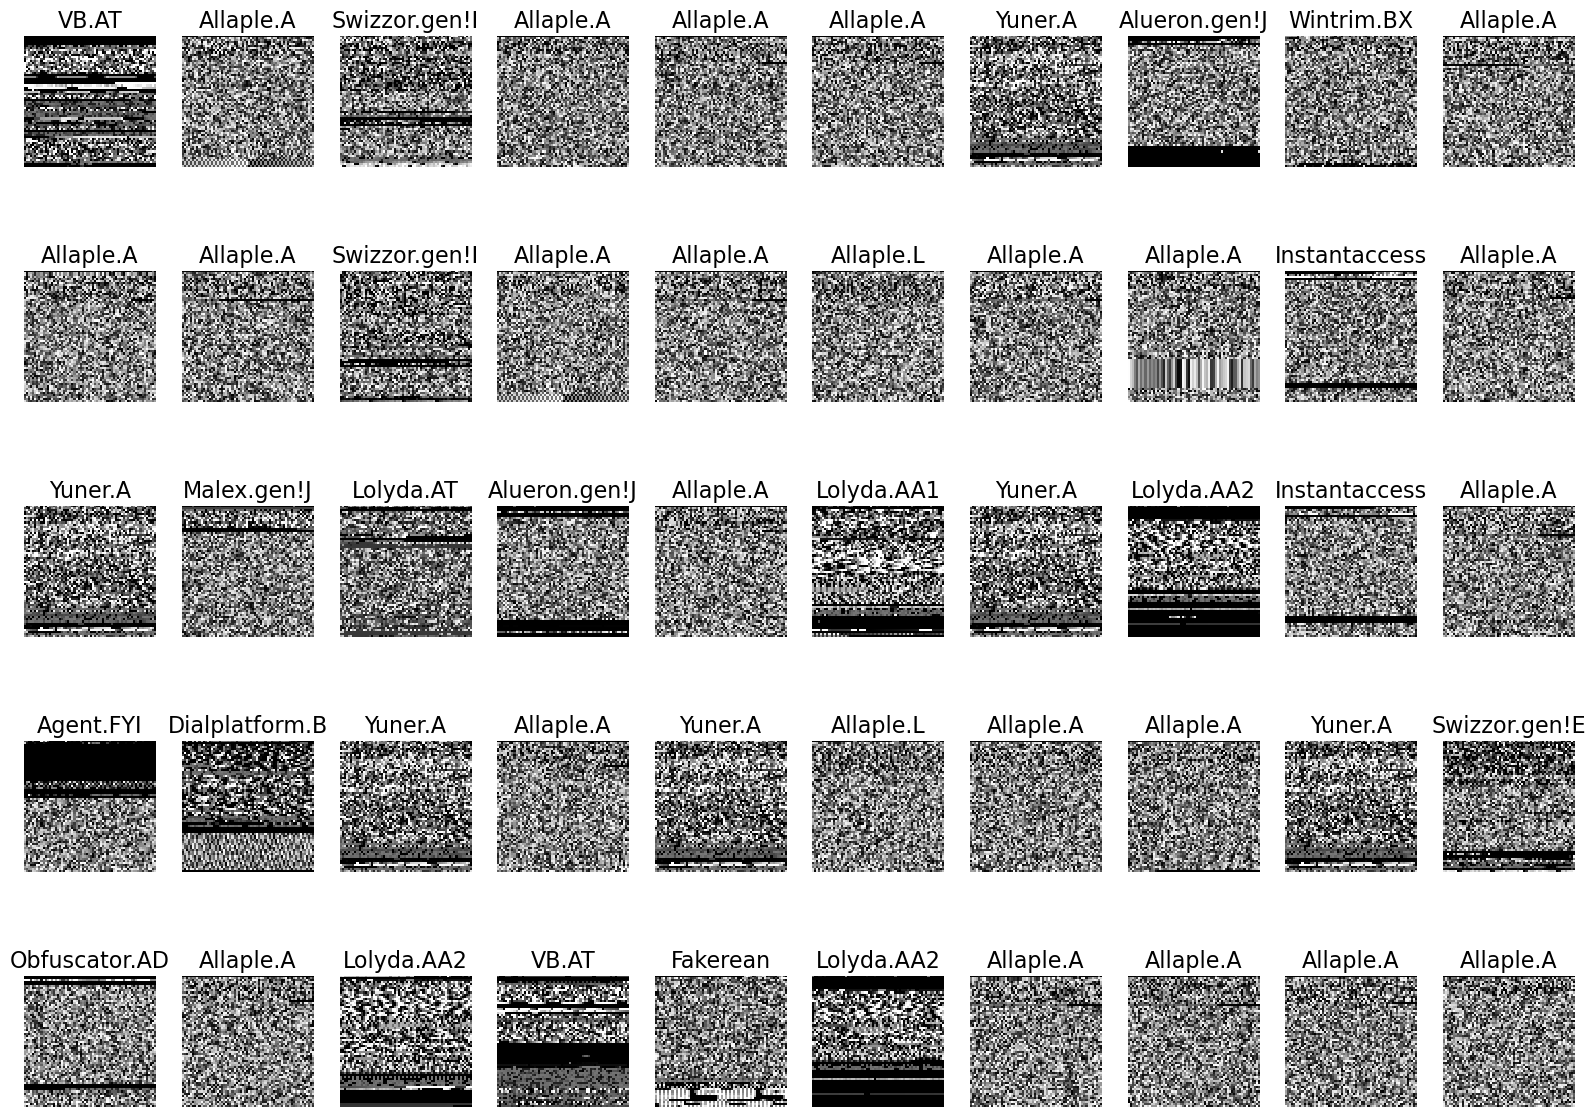

In [14]:
plots(imgs, titles = labels)

We can already observe differences between classes.

# Analyse

All our images are finally ready to be used. Lets check out the repartition of data between classes :

In [15]:
classes = batches.class_indices.keys()

In [16]:
perc = (sum(labels)/labels.shape[0])*100

<BarContainer object of 25 artists>

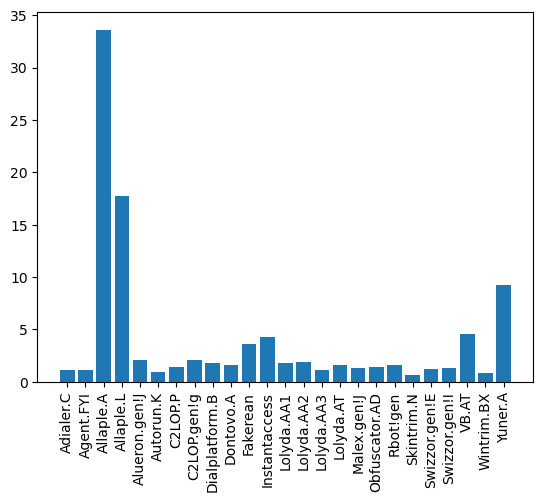

In [17]:
plt.xticks(rotation='vertical')
plt.bar(classes,perc)

# Train and test

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(imgs/255.,labels, test_size=0.3)

In [ ]:
#Change shape of the data
#np.reshape(X_train, (1, 357)) 
#np.reshape(X_test, (1, 357))
#np.reshape(y_train, (1, 357))
#np.reshape(y_test, (1,357))

In [19]:
X_train.shape

(5882, 64, 64, 3)

In [20]:
X_test.shape

(2522, 64, 64, 3)

In [21]:
y_train.shape

(5882, 25)

In [22]:
y_test.shape

(2522, 25)

# Convolutional Neural Network Model

* **Convolutional Layer** : 30 filters, (3 * 3) kernel size
* **Max Pooling Layer** : (2 * 2) pool size
* **Convolutional Layer** : 15 filters, (3 * 3) kernel size
* **Max Pooling Layer** : (2 * 2) pool size
* **DropOut Layer** : Dropping 25% of neurons.
* **Flatten Layer**
* **Dense/Fully Connected Layer** : 128 Neurons, Relu activation function
* **DropOut Layer** : Dropping 50% of neurons.
* **Dense/Fully Connected Layer** : 50 Neurons, Softmax activation function
* **Dense/Fully Connected Layer** : num_class Neurons, Softmax activation function

**Input shape** : 64 * 64 * 3

In [135]:
import tensorflow.keras
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, LSTM
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ConvLSTM2D
from tensorflow.keras.layers import BatchNormalization
from keras.layers.pooling import GlobalAveragePooling1D



ModuleNotFoundError: No module named 'tensorflow.keras.layers.Wrapper'

We want **25** classes as output.

In [24]:
num_classes = 25

Building the model

ANN model

In [82]:
def malware_model_ann():
    # Initialising the ANN
    model = Sequential()
    #model.add(Conv2D(30, kernel_size=(3, 3),
    #                 activation='relu',
    #                 input_shape=(64,64,3)))

    #model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Conv2D(15, (3, 3), activation='relu'))
    #model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten(input_shape = (64,64,3)))
    # Adding the input layer and the first hidden layer 
    model.add(Dense(units = 300, kernel_initializer = 'uniform', 
                activation = 'relu'))
    # Adding the second hidden layer
    model.add(Dense(units = 250, kernel_initializer = 'uniform', 
                    activation = 'relu'))
    # Adding the third hidden layer
    model.add(Dense(units = 50, kernel_initializer = 'uniform', 
                    activation = 'relu'))
    # Adding the output layer
    model.add(Dense(units = 25, kernel_initializer = 'uniform', 
                    activation = 'sigmoid'))
    # Compiling the ANN
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', 
                metrics = ['accuracy'])
    return model

CNN model

In [ ]:
def malware_model():
    Malware_model = Sequential()
    Malware_model.add(Conv2D(30, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(64,64,3)))

    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_model.add(Conv2D(15, (3, 3), activation='relu'))
    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_model.add(Dropout(0.25))
    Malware_model.add(Flatten())
    Malware_model.add(Dense(128, activation='relu'))
    Malware_model.add(Dropout(0.5))
    Malware_model.add(Dense(50, activation='relu'))
    Malware_model.add(Dense(num_classes, activation='softmax'))
    Malware_model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    return Malware_model

RNN model

In [134]:
def RNN_model():
    model=Sequential();                          
    model.add(LSTM(128, input_shape=(64,64,3), return_sequences=True))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(25, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [131]:
Malware_model = RNN_model()

ValueError: Input 0 of layer "lstm_25" is incompatible with the layer: expected ndim=3, found ndim=5. Full shape received: (None, None, 64, 64, 3)

In [126]:
Malware_model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_23 (LSTM)              (None, 64, 128)           67584     
                                                                 
 lstm_24 (LSTM)              (None, 64)                49408     
                                                                 
 dense_46 (Dense)            (None, 25)                1625      
                                                                 
Total params: 118,617
Trainable params: 118,617
Non-trainable params: 0
_________________________________________________________________


In [127]:
y_train.shape

(5882, 25)

In [128]:
y_train_new = np.argmax(y_train, axis=1)

In [68]:
y_train_new

array([24,  2,  2, ..., 22, 24, 10], dtype=int64)

In [69]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(
                                                    class_weight = 'balanced',
                                                    classes = np.unique(y_train_new),
                                                    y = y_train_new
                                                )
class_weights = dict(enumerate(class_weights))

In [129]:
import tensorflow as tf
train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train))
valid_data = tf.data.Dataset.from_tensor_slices((X_test, y_test))

#Malware_model.fit((X_train), (y_train), epochs=10, validation_data=(X_test, y_test), class_weight = class_weights)
Malware_model.fit((X_train), (y_train), epochs=10, validation_data=(X_test, y_test))    

Epoch 1/10


ValueError: in user code:

    File "d:\anaconda\envs\deepLearning\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "d:\anaconda\envs\deepLearning\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "d:\anaconda\envs\deepLearning\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "d:\anaconda\envs\deepLearning\lib\site-packages\keras\engine\training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "d:\anaconda\envs\deepLearning\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "d:\anaconda\envs\deepLearning\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_31" is incompatible with the layer: expected shape=(None, 64, 3), found shape=(None, 64, 64, 3)


In [49]:
scores = Malware_model.evaluate(X_test, y_test)

94/94 [==============================] - 1s 8ms/step - loss: 1.2662 - accuracy: 0.6557


In [50]:
print('Final CNN accuracy: ', scores[1])

Final CNN accuracy:  0.6556666493415833


# Confusion Matrix

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
y_pred = np.argmax( Malware_model.predict(X_test, verbose=0), axis = 1)

In [ ]:
y_pred

array([ 6,  9,  6, ..., 10, 10, 13], dtype=int64)

In [ ]:
y_test2 = np.argmax(y_test, axis=1)

In [ ]:
y_test2

array([ 6, 15,  6, ..., 10,  0,  0], dtype=int64)

In [ ]:
from sklearn import metrics
c_matrix = metrics.confusion_matrix(y_test2, y_pred)

In [ ]:
import seaborn as sns
def confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

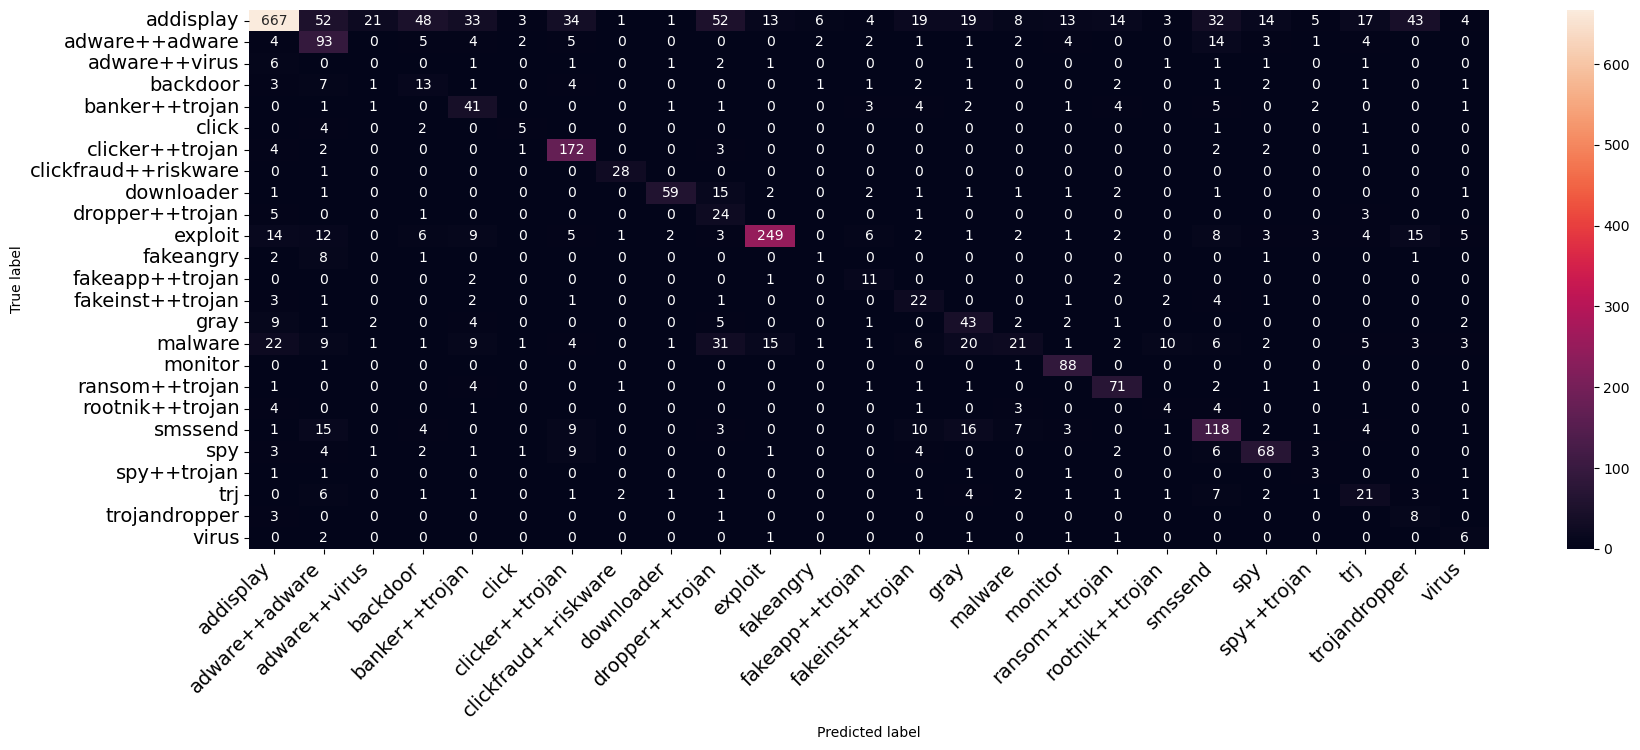

In [ ]:
class_names= batches.class_indices.keys()
confusion_matrix(c_matrix, class_names, figsize = (20,7), fontsize=14)